<a href="https://colab.research.google.com/github/NgoMinhQuang/BaiTapAI_ANN/blob/main/robot3dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#import library
import numpy as np
import math as m
import csv
import pandas as pd
import matplotlib.pyplot as plt
from numpy.lib.function_base import append
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
#create data
l1 = 50 #length for link 1
l2 = 40 #length for link 2
l3 = 20 #length for link 3
x_train = []
y_train = []
data=[]
a = []
for t1 in range(0, 180, 2): 
  for t2 in range(0, 180, 2):
    #forward kinematics
    t3 = 90-t2-t1
    px = l1*m.cos(m.radians(t1)) + l2*m.cos(m.radians(t1+t2)) + l3*m.cos(m.radians(t1+t2+t3))
    py = l1*m.sin(m.radians(t1)) + l2*m.sin(m.radians(t1+t2)) + l3*m.sin(m.radians(t1+t2+t3))
    t1 = t1/180.0
    t2 = t2/180.0
    t3 = (t3+180.0)/360.0
    px = (px+110)/220
    py = (py+110)/220
    a.append(np.array((t1, t2, t3, px, py)))#colletion of variables into an array
  data.extend(a)

In [13]:
#save data to file robot3dof.csv
header = ['t1', 't2', 't3', 'Px', 'Py']
with open('robot_3_dof.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)
    # write multiple rows
    writer.writerows(data)

In [4]:
#handeling data
data=pd.read_csv('robot_3_dof.csv')
x=np.array(data.drop(['t1','t2','t3'],axis=1)) #create variable y containing input data is px, py 
y=np.array(data[['t1','t2','t3',]])  #create variable y containing output data is angle t1, t2
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
x_train.shape

(294840, 2)

In [5]:
#create model
model = Sequential() 
model.add(Dense(64, activation='relu', input_shape = (2,))) #2 input and 64 noron for layer 1
model.add(Dense(32, activation='relu'))#32 noron for layer 2
model.add(Dense(16, activation='relu'))#16 noron for layer 3
model.add(Dense(3)) #3 output
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [6]:
#80% data for train, 20% data for test
model.compile(loss='mae', optimizer =Adam(), metrics=['acc']) 
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2) 

Epoch 1/10
7371/7371 [==============================] - 18s 2ms/step - loss: 0.0085 - acc: 0.9858 - val_loss: 0.0065 - val_acc: 0.9894
Epoch 2/10
7371/7371 [==============================] - 17s 2ms/step - loss: 0.0039 - acc: 0.9919 - val_loss: 0.0040 - val_acc: 0.9897
Epoch 3/10
7371/7371 [==============================] - 16s 2ms/step - loss: 0.0033 - acc: 0.9927 - val_loss: 0.0020 - val_acc: 0.9895
Epoch 4/10
7371/7371 [==============================] - 17s 2ms/step - loss: 0.0029 - acc: 0.9936 - val_loss: 0.0020 - val_acc: 0.9996
Epoch 5/10
7371/7371 [==============================] - 16s 2ms/step - loss: 0.0026 - acc: 0.9937 - val_loss: 0.0042 - val_acc: 0.9999
Epoch 6/10
7371/7371 [==============================] - 16s 2ms/step - loss: 0.0023 - acc: 0.9940 - val_loss: 0.0023 - val_acc: 0.9896
Epoch 7/10
7371/7371 [==============================] - 16s 2ms/step - loss: 0.0021 - acc: 0.9939 - val_loss: 0.0022 - val_acc: 0.9999
Epoch 8/10
7371/7371 [==============================] -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


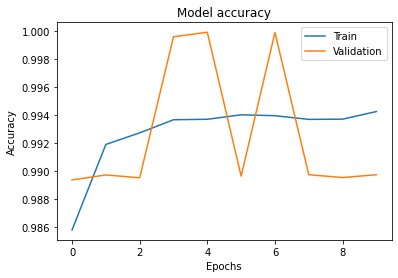

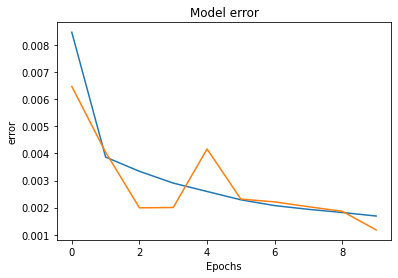

In [7]:
#plot accurracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

#plot error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('Epochs')
plt.show()

In [8]:
#save model
model.save_weights('robot3dof.h5')

In [11]:
px = (float(input("Px_desires: "))+110.0)/220.0
py = (float(input("Py_desires: "))+110.0)/220.0
test = model.predict([[px,py]])
t1 = test[0][0]*180.0
t2 = test[0][1]*180.0
t3 = test[0][2]*360-180
px_predict = l1*m.cos(m.radians(t1)) + l2*m.cos(m.radians(t1+t2)) + l3*m.cos(m.radians(t1+t2+t3))
py_predict = l1*m.sin(m.radians(t1)) + l2*m.sin(m.radians(t1+t2)) + l3*m.sin(m.radians(t1+t2+t3))
print('Px_pre = ',px_predict,'Py_pre = ',py_predict)
print('t1_pre = ',t1,'t2_pre = ',t2,'t3_pre = ',t3)

Px_desires: 90
Py_desires: 20
Px_pre =  90.17775080442917 Py_pre =  20.750611929938785
t1_pre =  0.24442283436655998 t2_pre =  0.5264291167259216 t3_pre =  88.70824813842773
